# Hacktiv8 Phase 1: Non Graded Challenge 1

---

Non-Graded Assignment ini dibuat guna mengevaluasi pembelajaran pada Hacktiv8 Data Science Fulltime Program khususnya pada konsep Logistic Regression.

## Introduction

By [Rifky Aliffa](https://github.com/Penzragon)

### Dataset

Dataset yang digunakan dalam project ini adalah dataset stroke yang berisi 5110 baris dengan 12 kolom yang diantaranya adalah id, gender, age, hypertension, heart_disease, ever_married, work_type, residence_type, avg_glucose_level, bmi, smoking_status, dan stroke. Dataset dapat dilihat di [Kaggle](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset).

Keterangan kolom pada dataset ini adalah:

| Feature           | Description                                                                            |
| ----------------- | -------------------------------------------------------------------------------------- |
| id                | unique identifier                                                                      |
| gender            | "Male", "Female" or "Other"                                                            |
| age               | age of the patient                                                                     |
| hypertension      | 0 if the patient doesn't have hypertension, 1 if the patient has hypertension          |
| heart_disease     | 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease |
| ever_married      | "No" or "Yes"                                                                          |
| work_type         | "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"                   |
| Residence_type    | "Rural" or "Urban"                                                                     |
| avg_glucose_level | average glucose level in blood                                                         |
| bmi               | body mass index                                                                        |
| smoking_status    | "formerly smoked", "never smoked", "smokes" or "Unknown"                               |
| stroke            | 1 if the patient had a stroke or 0 if not                                              |


### Objectives

- Lakukan cleaning dan preprocessing terhadap data yang akan dipakai.
- Buat sebuah classification model dengan menggunakan Logistic Regression dengan stroke prediction sebagai target.

## Import Libraries

Pada project ini library yang akan digunakan adalah **Pandas**, **Numpy**, **Matplotlib**, **Seaborn**, dan **scikit-learn**.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Data Loading

Membuat dataframe bernama **stroke** dari file csv bernama `healthcare-dataset-stroke-data.csv`.

In [2]:
stroke = pd.read_csv('healthcare-dataset-stroke-data.csv')
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Data Characteristics

In [3]:
stroke.shape

(5110, 12)

Dataframe terdiri dari **5110 rows** dan **12 columns**.

In [4]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Dataframe ini terdiri dari:
- 3 kolom dengan tipe data **float**
- 4 kolom dengan tipe data **integer**
- 5 kolom dengan tipe data **object**

Dari info ini juga dapat dilihat terdapat missing value pada kolom `bmi`.

In [5]:
stroke.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


Dari tabel diatas dapat diketahui beberapa hal, yaitu:
- Distribusi dari kolom `age` dan `bmi` cenderung normal, karena **mean** dan **median** berdekatan.
- Body Mass Index (**BMI**) paling kecil adalah **10.30** dengan yang paling besar adalah **97.60** maka range dari kolom tersebut adalah **87.30**.

## Data Cleansing

### Missing Value

In [6]:
stroke.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Terdapat **201 missing value** pada kolom `bmi`.

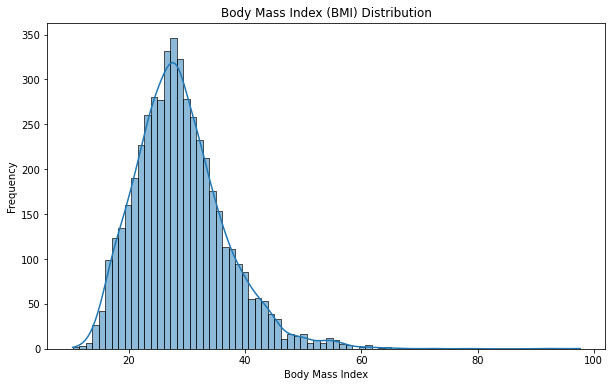

Skewness: 1.0553402052962912


In [7]:
plt.figure(figsize=(10,6))
sns.histplot(x='bmi', data=stroke, kde=True)
plt.title('Body Mass Index (BMI) Distribution')
plt.xlabel('Body Mass Index')
plt.ylabel('Frequency')
plt.show()
print(f'Skewness: {stroke.bmi.skew()}')

Karena nilai skewness dari kolom `bmi` ini lebih besar dari 1, dapat disimpulkan bahwa distribusi dari kolom `bmi` ini sangat miring. Maka missing value akan diisi oleh nilai **median** dari kolom tersebut.

In [8]:
stroke['bmi'] = stroke['bmi'].fillna(stroke['bmi'].median())

In [9]:
stroke.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Setelah missing value diisi dengan nilai mean dari kolom `bmi`, tidak lagi terdapat missing value pada kolom tersebut.

### Duplicate Data

In [10]:
stroke.duplicated().any()

False

Tidak terdapat duplicated data pada dataset.

## Exploratory Data Analysis (EDA)

In [11]:
stroke.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

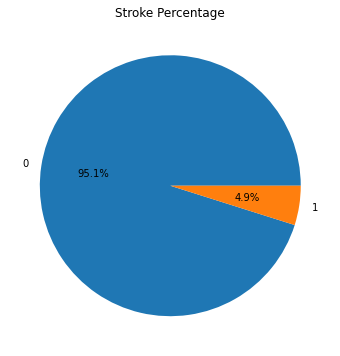

In [12]:
plt.figure(figsize=(10, 6))
plt.pie(stroke.stroke.value_counts(), labels=stroke.stroke.value_counts().index, autopct='%1.1f%%')
plt.title('Stroke Percentage')
plt.show()

Terdapat **249** dari 5110 pasien atau sekitar **5%** pasien yang memiliki stroke.

In [13]:
stroke.groupby(['stroke', 'gender']).size()

stroke  gender
0       Female    2853
        Male      2007
        Other        1
1       Female     141
        Male       108
dtype: int64

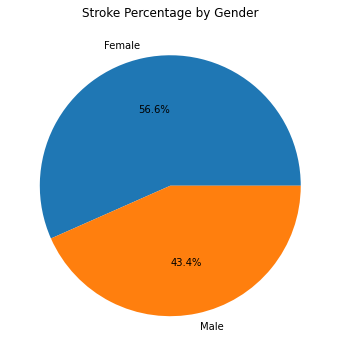

In [14]:
plt.figure(figsize=(10, 6))
plt.pie(stroke[stroke.stroke == 1].groupby('gender').size(), labels=stroke[stroke.stroke == 1].groupby('gender').size().index, autopct='%1.1f%%')
plt.title('Stroke Percentage by Gender')
plt.show()

Dari data diatas dapat diketahui, sekitar **57%** pasien atau **141** dari 249 pasien yang memiliki stroke adalah **wanita**

### Gender

In [15]:
print(f'Number of unique Gender: {stroke.gender.nunique()}')
print(f'Unique Gender: {stroke.gender.unique()}')

Number of unique Gender: 3
Unique Gender: ['Male' 'Female' 'Other']


In [16]:
stroke.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

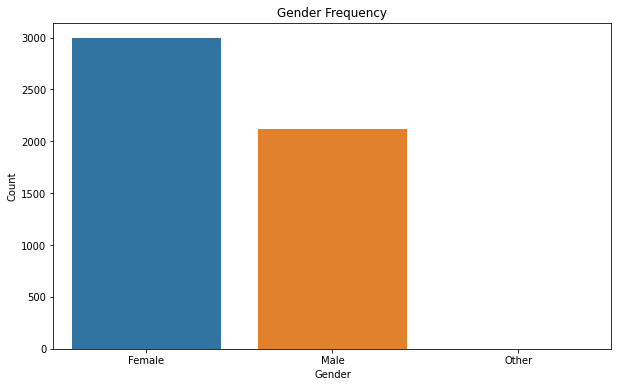

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', data=stroke, order=stroke.gender.value_counts().sort_values(ascending=False).index)
plt.title('Gender Frequency')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Gender paling banyak muncul di dataset adalah pasien yang bergender **female** yang berjumlah **2994 pasien**, sedangkan pasien yang bergender **male** ada sebanyak **2155 pasien**. Pada dataset juga terdapat **1 pasien** yang memiliki gender **other**.

### Age

In [19]:
print(f'Number of unique Age: {stroke.age.nunique()}')
print(f'Min Age: {stroke.age.min()}')
print(f'Max Age: {stroke.age.max()}')

Number of unique Age: 104
Min Age: 0.08
Max Age: 82.0


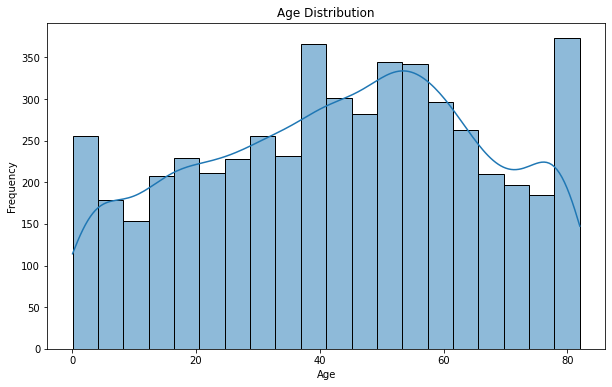

Skewness: -0.1370593225984694


In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(x='age', data=stroke, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
print(f'Skewness: {stroke.age.skew()}')

Terdapat **104** usia yang berbeda pada dataset dengan usia paling rendah adalah **0.08 tahun** dan yang paling tinggi yaitu **82 tahun**. Distribusi dari kolom `age` ini juga cenderung normal karena nilai skewnessnya berada diantara -0.5 dan 0.5.